# Data Analysis: Diabetes Prediction

### Objective: 
- To enhance data management skills (Data Wrangling)

- To practice exploratory data analysis (EDA)

- To learn and apply sampling strategies

- To implement machine learning algorithms such as KNN and Decision Tree

- To evaluate and compare model performance

### 1. Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
# Explore the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Examine data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Check for zero values that might represent missing data
print("Zero values in each column:")
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

Zero values in each column:
Pregnancies: 111 zeros (14.45%)
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)
DiabetesPedigreeFunction: 0 zeros (0.00%)
Age: 0 zeros (0.00%)
Outcome: 500 zeros (65.10%)


In [7]:
# Handle missing values (zeros in medical measurements)
# For Glucose, BloodPressure, SkinThickness, Insulin, BMI, we'll replace zeros with NaN and then impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create a copy for cleaning
df_clean = df.copy()

# Replace zeros with NaN in medical measurement columns
for col in columns_to_impute:
    df_clean[col] = df_clean[col].replace(0, np.nan)

print("\nMissing values after zero replacement:")
print(df_clean.isnull().sum())


Missing values after zero replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
# Impute missing values with median
for col in columns_to_impute:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

print("Missing values after imputation:")
print(df_clean.isnull().sum())

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Check for duplicates
print(f"\nDuplicate rows: {df_clean.duplicated().sum()}")


Duplicate rows: 0


In [10]:
# Basic statistics
print("\nBasic Statistics:")
print(df_clean.describe())


Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.20000

### 2. Exploratory Data Analysis (EDA)

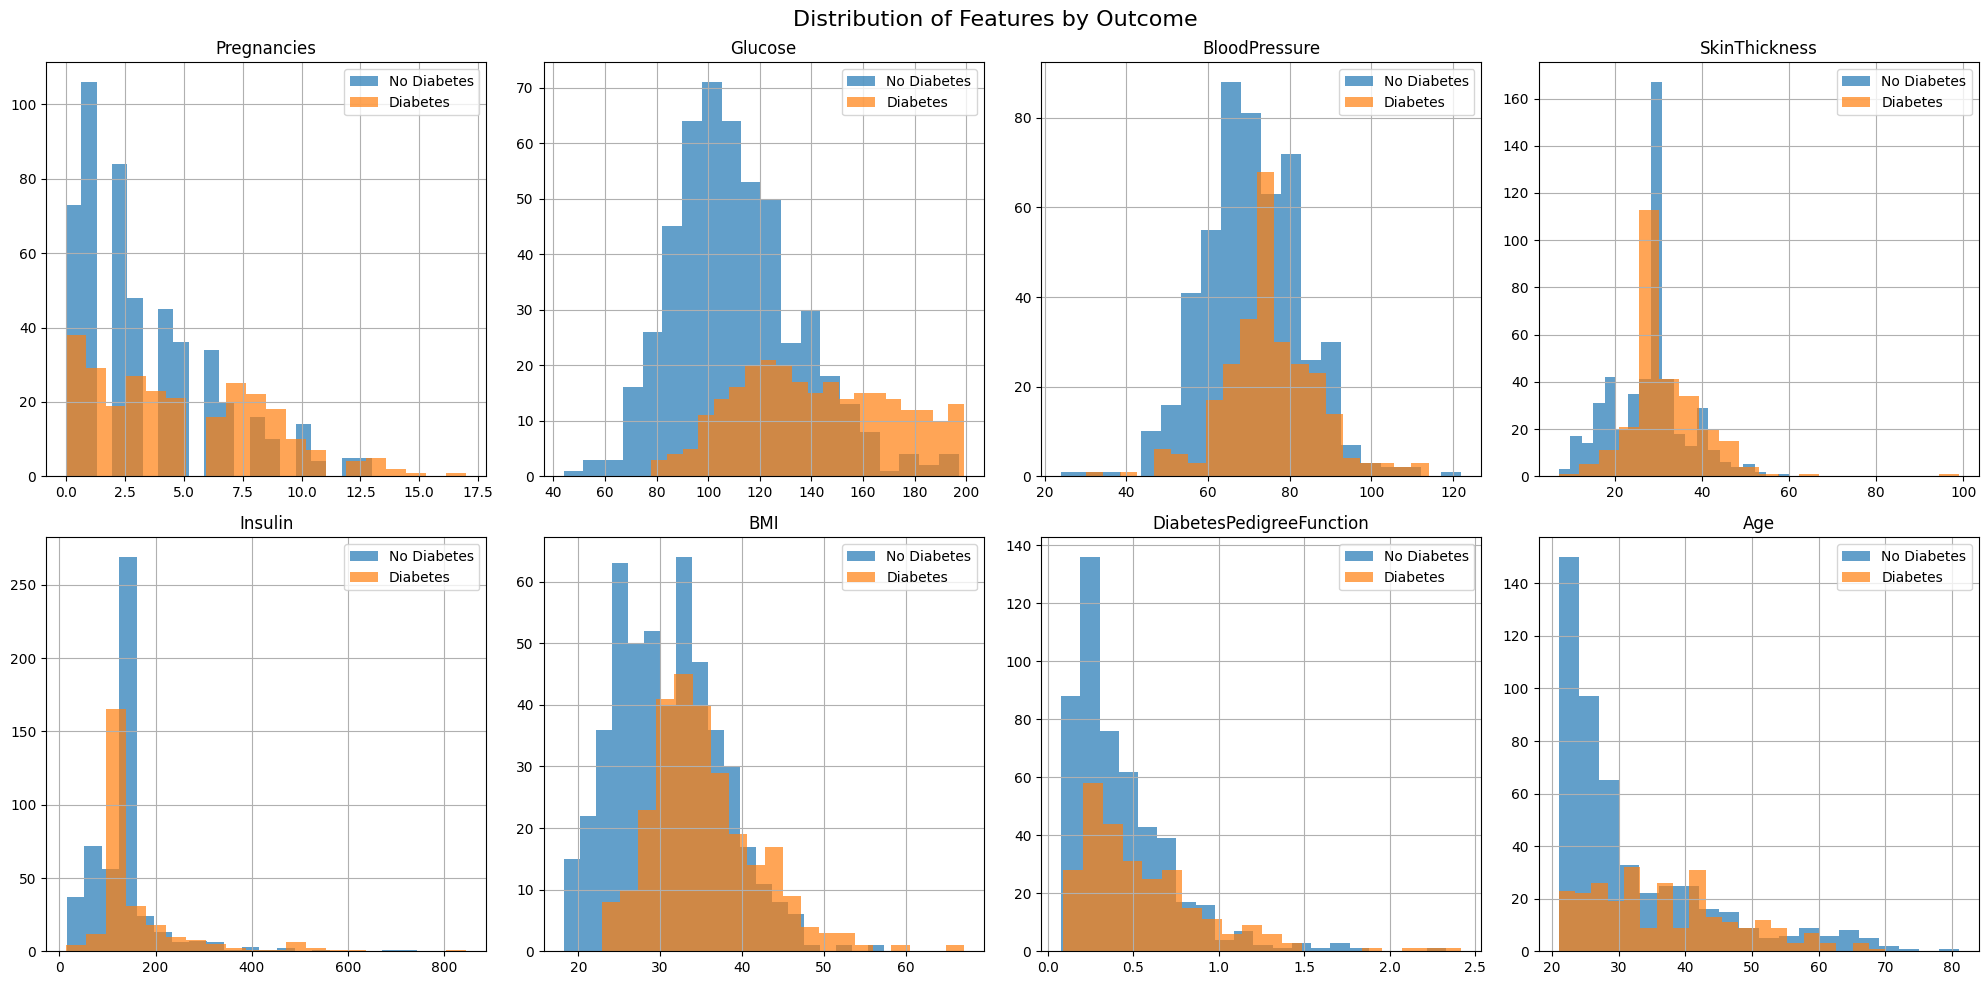

In [11]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Features by Outcome', fontsize=16)

# Plot distributions for each feature
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    df_clean[df_clean['Outcome'] == 0][feature].hist(alpha=0.7, ax=axes[row, col], label='No Diabetes', bins=20)
    df_clean[df_clean['Outcome'] == 1][feature].hist(alpha=0.7, ax=axes[row, col], label='Diabetes', bins=20)
    axes[row, col].set_title(feature)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

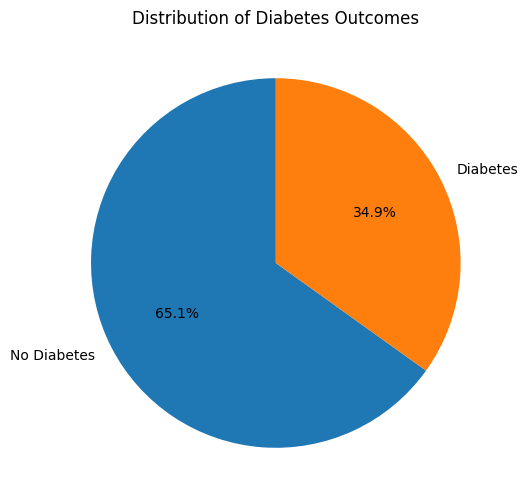

Outcome distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


In [12]:
# Outcome distribution
plt.figure(figsize=(8, 6))
outcome_counts = df_clean['Outcome'].value_counts()
plt.pie(outcome_counts.values, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Outcomes')
plt.show()

print("Outcome distribution:")
print(outcome_counts)

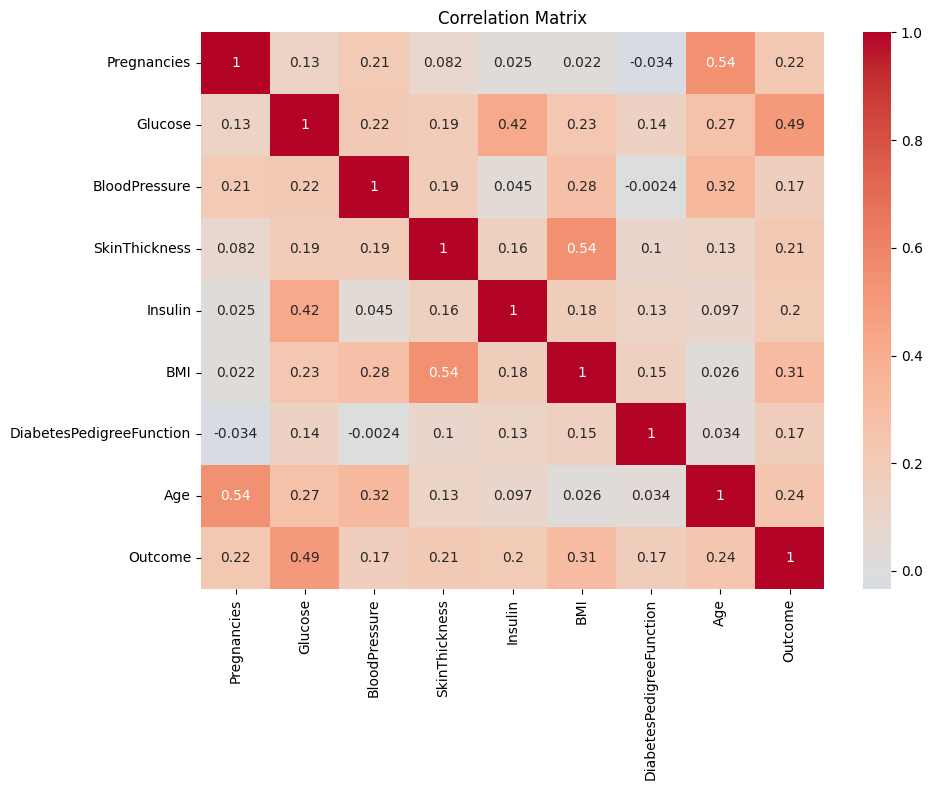

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [13]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlation with Outcome:")
print(correlation_matrix['Outcome'].sort_values(ascending=False))

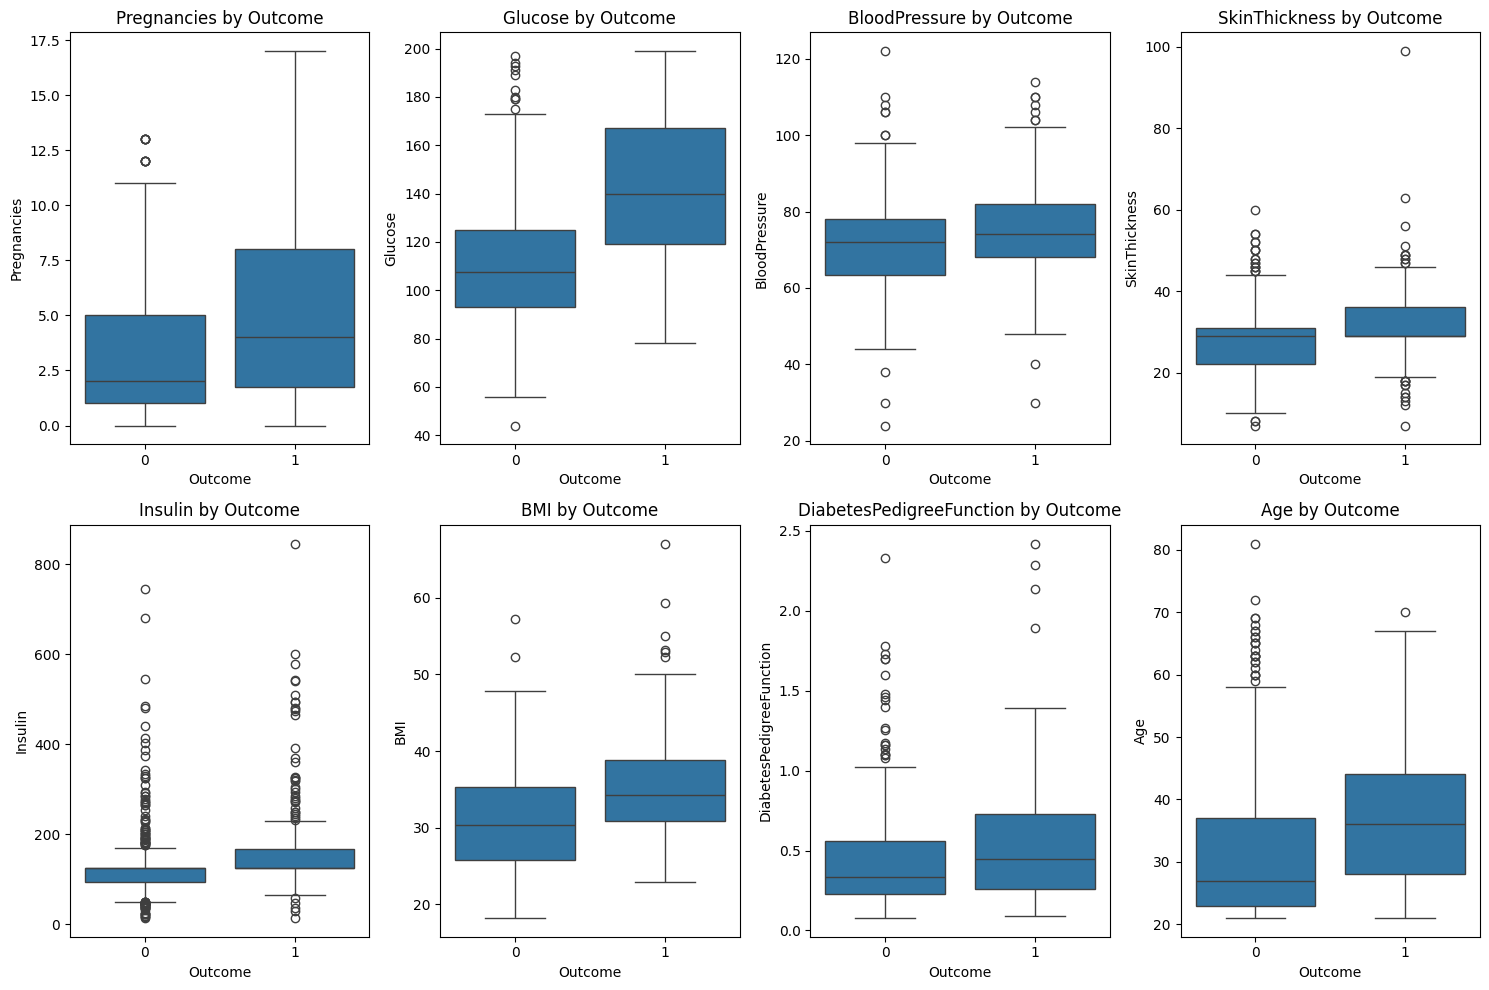

In [14]:
# Box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=df_clean)
    plt.title(f'{feature} by Outcome')
plt.tight_layout()
plt.show()

### 3. Sampling Strategy

In [15]:
# Prepare features and target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Stratified sampling to maintain outcome distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTraining set outcome distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set outcome distribution:")
print(y_test.value_counts(normalize=True))

Training set shape: (537, 8)
Testing set shape: (231, 8)

Training set outcome distribution:
Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64

Testing set outcome distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


### 4. K-Nearest Neighbors (KNN) Algorithm

In [16]:
# Scale the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

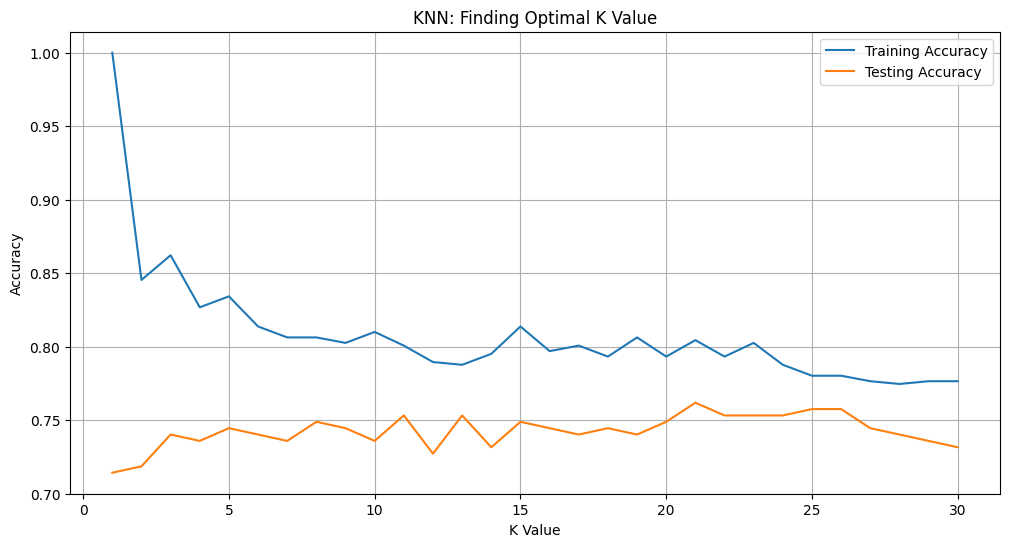

In [17]:
# Find optimal K value
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot K values vs accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, label='Training Accuracy')
plt.plot(k_range, test_scores, label='Testing Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Finding Optimal K Value')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Train KNN with optimal K
optimal_k = k_range[np.argmax(test_scores)]
print(f"Optimal K value: {optimal_k}")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print("KNN Performance Metrics:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")

Optimal K value: 21
KNN Performance Metrics:
Accuracy: 0.7619
Precision: 0.6970
Recall: 0.5679
F1-Score: 0.6259


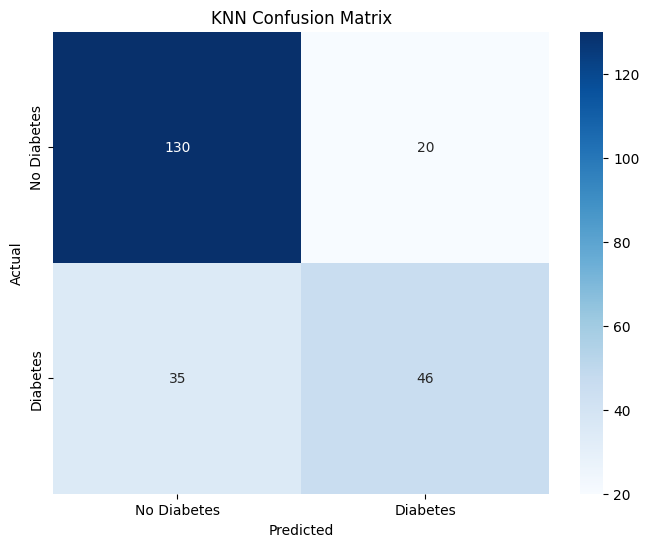

In [19]:
# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['No Diabetes', 'Diabetes'], 
           yticklabels=['No Diabetes', 'Diabetes'])
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 5. Decision Tree Algorithm

In [20]:
# Decision Tree with hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.7541


In [21]:
# Train with best parameters
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

Decision Tree Performance Metrics:
Accuracy: 0.7186
Precision: 0.6333
Recall: 0.4691
F1-Score: 0.5390


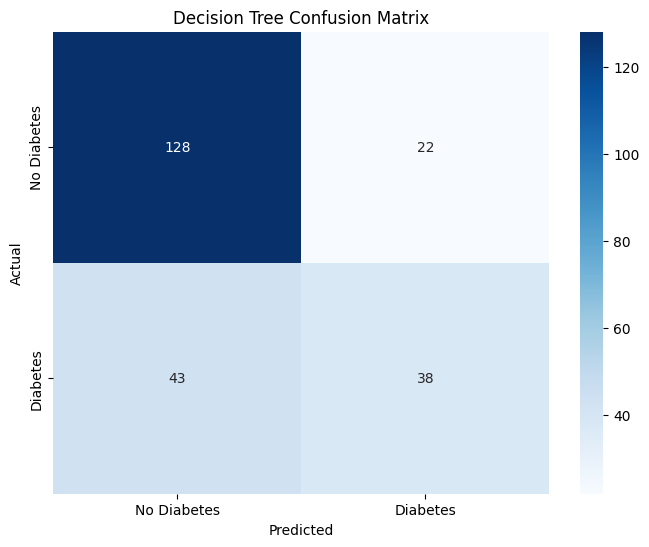

In [22]:
# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['No Diabetes', 'Diabetes'], 
           yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

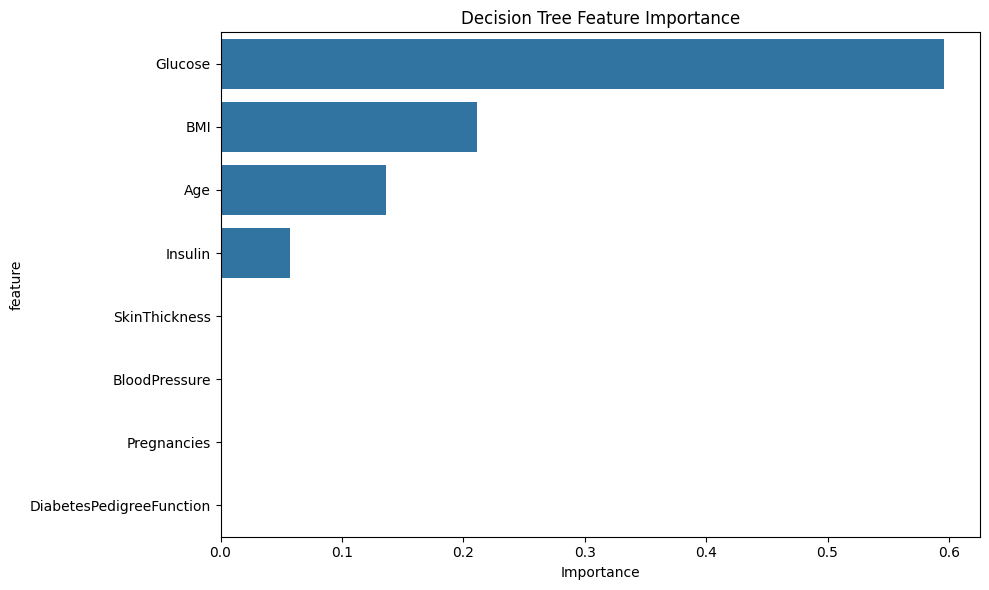

Feature Importance:
                    feature  importance
1                   Glucose    0.595799
5                       BMI    0.211139
7                       Age    0.136239
4                   Insulin    0.056823
3             SkinThickness    0.000000
2             BloodPressure    0.000000
0               Pregnancies    0.000000
6  DiabetesPedigreeFunction    0.000000


In [23]:
# Feature importance from Decision Tree
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("Feature Importance:")
print(feature_importance)

### 6. Model Evaluation and Comparison

In [24]:
# Compare model performance
comparison_df = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [knn_accuracy, dt_accuracy],
    'Precision': [knn_precision, dt_precision],
    'Recall': [knn_recall, dt_recall],
    'F1-Score': [knn_f1, dt_f1]
})

print("Model Comparison:")
comparison_df.round(4)

Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,0.7619,0.6970,0.5679,0.6259
1,Decision Tree,0.7186,0.6333,0.4691,0.5390


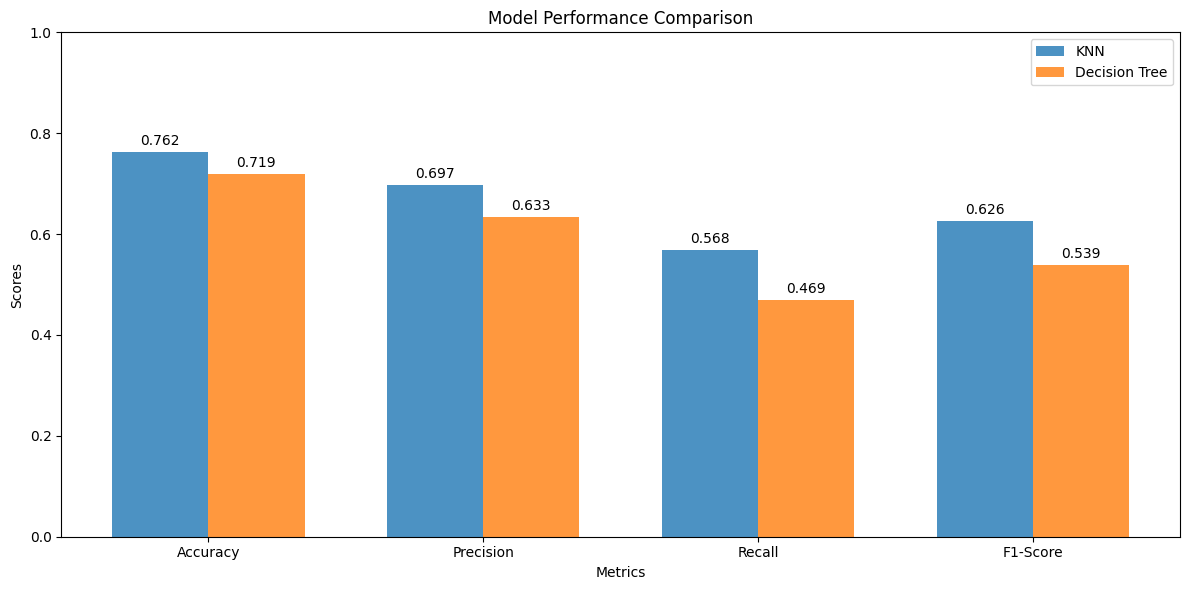

In [25]:
# Visual comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]

rects1 = ax.bar(x - width/2, knn_scores, width, label='KNN', alpha=0.8)
rects2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [26]:
# Detailed classification reports
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.57      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       150
           1       0.63      0.47      0.54        81

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



### 7. Conclusion and Insights

- A complete machine learning workflow for diabetes prediction was demonstrated. Missing values in key medical measurements were handled through systematic data wrangling. EDA revealed that Glucose levels had the strongest correlation with diabetes outcomes, and stratified sampling preserved class distribution across splits.

- KNN (K=21) and Decision Tree models achieved comparable performance, with the Decision Tree providing better interpretability via feature importance. Glucose, BMI, and Age were identified as the most predictive features. Essential data science skills, including preprocessing, model training, hyperparameter tuning, and evaluation, were reinforced.